In [1]:
import math
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

In [2]:
file = ".." + os.sep + "data" + os.sep + "tianchi_mobile_recommend_train_user.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df.sample(3)

user_id    item_id  behavior_type user_geohash  item_category  \
2857455   122742392   40285277              1      967n5uo           5232   
11976304   74067634  122128548              1          NaN           3846   
8263324    99273913  364973777              1          NaN          11552   

                   time  
2857455   2014-11-24 21  
11976304  2014-11-26 06  
8263324   2014-12-11 12

In [5]:
user_amount  = len(list(set(df["user_id"])))
item_amount  = len(list(set(df["item_id"])))
category_amount  = len(list(set(df["item_category"])))

In [6]:
print("There are totally {} users, {} items, {} categories".format(
                        user_amount, item_amount, category_amount))

There are totally 10000 users, 2876947 items, 8916 categories


In [7]:
df.dtypes

user_id           int64
item_id           int64
behavior_type     int64
user_geohash     object
item_category     int64
time             object
dtype: object

In [8]:
df["time"] = pd.to_datetime(df["time"], format = "%Y-%m-%d %H")

In [9]:
df.dtypes

user_id                   int64
item_id                   int64
behavior_type             int64
user_geohash             object
item_category             int64
time             datetime64[ns]
dtype: object

In [10]:
# why slow?
print("time duration ({}, {})".format(min(df["time"]), max(df["time"])))

time duration (2014-11-18 00:00:00, 2014-12-18 23:00:00)


In [11]:
df["behavior_type"].value_counts()

1    11550581
3      343564
2      242556
4      120205
Name: behavior_type, dtype: int64

In [12]:
df["day"] = df["time"].map(lambda t: t.day)
df["month"] = df["time"].map(lambda t: t.month)
df["weekday"] = df["time"].map(lambda t: t.isoweekday())
df["hour"] = df["time"].map(lambda t: t.hour)

In [13]:
df_1 = df[df["behavior_type"] == 1]
df_2 = df[df["behavior_type"] == 2]
df_3 = df[df["behavior_type"] == 3]
df_4 = df[df["behavior_type"] == 4]

In [14]:
user_freq = pd.DataFrame()
behavior_list = ["view", "collect", "add_basket", "buy"]

for behavior, f in zip(behavior_list, [df_1, df_2, df_3, df_4]):
    u_g = f.groupby(["user_id"]).size()
    u_g = pd.DataFrame(u_g)
    u_g.columns = [behavior]
    user_freq = pd.merge(user_freq, u_g, left_index = True, right_index = True, how = "outer")

In [17]:
user_freq = user_freq.fillna(0)
user_freq.sample(5)

view  collect  add_basket   buy
user_id                                   
13222751    209      2.0         3.0   0.0
18927299   2722    140.0       254.0  79.0
35919625    465     13.0        13.0   8.0
32927277   1079      0.0        49.0  10.0
113025576    37      1.0         0.0   1.0

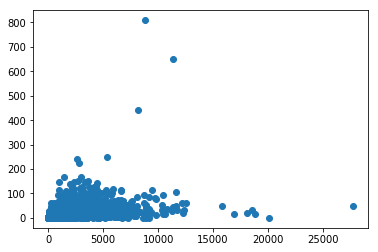

In [18]:
plt.scatter(user_freq["view"], user_freq["buy"])

In [18]:
# df[df["user_id"] == 68217968].sort_values( by = ["time"])

In [16]:
# df[:3]

In [19]:
user_item_df = df.drop_duplicates(["user_id", "item_category", "behavior_type"])

In [20]:
user_item_df_1 = user_item_df[user_item_df["behavior_type"] == 1]
user_item_df_2 = user_item_df[user_item_df["behavior_type"] == 2]
user_item_df_3 = user_item_df[user_item_df["behavior_type"] == 3]
user_item_df_4 = user_item_df[user_item_df["behavior_type"] == 4]

In [21]:
user_cat_freq = pd.DataFrame()
behavior_list = ["view", "collect", "add_basket", "buy"]

for behavior, f in zip(behavior_list, [user_item_df_1, user_item_df_2, 
                                       user_item_df_3, user_item_df_4]):
    u_g = f.groupby(["user_id"]).size()
    u_g = pd.DataFrame(u_g)
    u_g.columns = [behavior + "_cat"]
    user_cat_freq = pd.merge(user_cat_freq, u_g, left_index = True, right_index = True, how = "outer")

In [22]:
user_cat_freq = user_cat_freq.fillna(0)
user_cat_freq.sample(5)

view_cat  collect_cat  add_basket_cat  buy_cat
user_id                                                  
73031965          4          0.0             2.0      1.0
16911051        417         19.0             0.0      0.0
84786775         18          0.0             0.0      1.0
121933909        80          0.0             0.0      1.0
74952849        267        112.0             8.0      7.0

In [23]:
user_freq = pd.merge(user_freq, user_cat_freq, left_index = True, right_index = True, how = "outer")

In [24]:
user_freq.sort_values(by=["view"], ascending = False)

view  collect  add_basket    buy  view_cat  collect_cat  \
user_id                                                               
36233277   27720   2935.0       328.0   47.0       372        195.0   
73196588   20146      0.0         0.0    0.0      1131          0.0   
130270245  18857    726.0       185.0   18.0       419        138.0   
59511789   18558   1274.0       263.0   34.0       320        154.0   
65645933   18124   2600.0        27.0   19.0       325        151.0   
83813302   16874    277.0        81.0   16.0       311         50.0   
7234861    15791   1165.0       569.0   49.0       618        177.0   
52577851   12555     10.0       792.0   62.0       267          8.0   
137175187  12339    254.0       284.0   31.0       217         56.0   
52772551   12238    188.0        42.0   20.0       439         74.0   
74314315   12159    151.0       108.0   61.0       316         49.0   
116049086  11731    133.0       317.0   33.0       370         30.0   
53080199   11618    169.0       202.0   48.0       374         59.0   
139435539  11615    235.0       456.0  107.0       239         51.0   
38839327   11388     66.0       516.0   45.0       216         21.0   
123842164  11342    168.0       546.0  649.0       239         33.0   
45649071   11239    101.0       977.0   30.0       253         33.0   
131573117  10851    252.0       213.0   35.0       323         55.0   
70240139   10667     11.0       132.0   16.0       282          9.0   
21978171   10484    201.0       151.0   92.0       503         89.0   
37671999   10469    142.0        30.0   16.0       204         43.0   
59567091   10399     13.0       343.0   53.0       336         11.0   
5315279    10375    168.0      1810.0   34.0       281         30.0   
11361547    9823    119.0        33.0   11.0       301         44.0   
82905542    9816    103.0       440.0   77.0       201         25.0   
77374787    9714    924.0        58.0   83.0       234         88.0   
3694961     9405      5.0       197.0  115.0       514          4.0   
135402088   9343      4.0       234.0   25.0       350          4.0   
117026591   9184      0.0       113.0   36.0       327          0.0   
29791483    9161    134.0        48.0   10.0       213         44.0   
...          ...      ...         ...    ...       ...          ...   
40551843       5      0.0         0.0    0.0         3          0.0   
85652357       5      0.0         0.0    0.0         2          0.0   
82426549       5      0.0         0.0    0.0         1          0.0   
121079854      5      0.0         0.0    0.0         2          0.0   
3421308        5      0.0         0.0    0.0         1          0.0   
88574383       4      0.0         5.0    0.0         4          0.0   
37422648       4      0.0         0.0    0.0         1          0.0   
126505815      4      0.0         0.0    0.0         3          0.0   
133612359      4      0.0         0.0    0.0         2          0.0   
35935190       3      0.0         0.0    0.0         1          0.0   
64379712       3      0.0         0.0    0.0         1          0.0   
86458054       3      0.0         0.0    0.0         2          0.0   
115581614      3      1.0         0.0    0.0         2          1.0   
41219954       3      0.0         0.0    0.0         1          0.0   
1419642        3      0.0         0.0    0.0         2          0.0   
40893979       3      0.0         0.0    1.0         1          0.0   
100127501      3      0.0         0.0    0.0         1          0.0   
55832101       2      0.0         0.0    1.0         1          0.0   
126412579      2      0.0         1.0    0.0         2          0.0   
19818801       2      0.0         0.0    0.0         1          0.0   
5719706        2      0.0         0.0    1.0         1          0.0   
112915307      2      0.0         0.0    0.0         2          0.0   
10921017       2      0.0         0.0    0.0         2          0.0   
32386327       2      0.0         0.

In [24]:
# user_freq.to_excel("user_freq.xlsx")

#### 2014双十二期间的购买量
#### 双十二之前一周的阅读量(上周六至双十二周周五)

In [25]:
start_0 = datetime.datetime(2014, 12, 6)
end_0 = datetime.datetime(2014, 12, 11)
start_1 = datetime.datetime(2014, 12, 12)
end_1 = datetime.datetime(2014, 12, 14)

pre_sale_days = df[(df["time"] >= start_0) & (df["time"] <= end_0)]
sale_days = df[(df["time"] >= start_1) & (df["time"] <= end_1)]

In [26]:
pre_sale_users = pd.DataFrame()

behavior_type = ["view", "collect", "add_basket", "buy"]
behavior_num = [1, 2, 3, 4]

for num, b_type in zip(behavior_num, behavior_type):
    type_df = pre_sale_days[pre_sale_days["behavior_type"] == num]
    count_df = type_df.groupby(["user_id"]).size()
    count_df = pd.DataFrame(count_df)
    count_df.columns = ["presale_" + b_type]
    pre_sale_users = pd.merge(pre_sale_users, count_df, left_index = True, right_index = True, how = "outer")

In [27]:
pre_sale_users = pre_sale_users.fillna(0)
pre_sale_users.sample(5)

presale_view  presale_collect  presale_add_basket  presale_buy
user_id                                                                 
30353552         205.0              0.0                 3.0          0.0
83735095        1073.0              0.0                17.0          7.0
80254452          88.0              0.0                 0.0          0.0
2527320           89.0              2.0                 0.0          0.0
93687523         685.0             12.0                 0.0          0.0

In [28]:
sale_users = pd.DataFrame()

behavior_type = ["view", "collect", "add_basket", "buy"]
behavior_num = [1, 2, 3, 4]

for num, b_type in zip(behavior_num, behavior_type):
    type_df = sale_days[sale_days["behavior_type"] == num]
    count_df = type_df.groupby(["user_id"]).size()
    count_df = pd.DataFrame(count_df)
    count_df.columns = ["sale_" + b_type]
    sale_users = pd.merge(sale_users, count_df, left_index = True, right_index = True, how = "outer")

In [29]:
sale_users = sale_users.fillna(0)
sale_users.sample(5)

sale_view  sale_collect  sale_add_basket  sale_buy
user_id                                                      
25750592        86.0           0.0              0.0       0.0
79913494       229.0           0.0              2.0       0.0
102833698        4.0           0.0              0.0       0.0
47924940       134.0           0.0             25.0      12.0
137563818       11.0           0.0              0.0       1.0

In [30]:
user_freq = pd.merge(user_freq, pre_sale_users, left_index = True, right_index = True, how = "outer")
user_freq = pd.merge(user_freq, sale_users, left_index = True, right_index = True, how = "outer")

In [31]:
user_freq = user_freq.fillna(0)

In [32]:
# user_freq

In [33]:
user_freq["sale_buy_ratio"] = user_freq.apply(lambda r: r["sale_buy"]/r["buy"] if r["buy"] != 0 else -1, axis = 1)

In [34]:
user_freq["sale_view_ratio"] = user_freq.apply(lambda r: r["sale_view"]/r["view"], axis =1)

In [35]:
user_freq["presale_view_ratio"] = user_freq.apply(lambda r: r["presale_view"]/r["view"], axis =1)
user_freq["presale_buy_ratio"] = user_freq.apply(lambda r: r["presale_buy"]/r["buy"] if r["buy"] != 0 else -1, axis = 1)

In [36]:
# user_freq

In [37]:
user_freq["avg_buy_cat"] = user_freq.apply(lambda r: r["buy"]/r["buy_cat"], axis = 1)

/home/yangsi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [36]:
#user_freq.to_excel("user_freq.xlsx")

In [34]:
# user_freq.sort_values(by=["sale_buy_ratio"], ascending = False)[["buy", "sale_buy"]]

In [50]:
# tmp = user_freq[user_freq["sale_buy_ratio"] > 0]
# # tmp = tmp[tmp["buy"] < 50]
# plt.scatter(tmp["sale_view_ratio"], tmp["sale_buy_ratio"])

In [51]:
# plt.scatter(user_freq["presale_view_ratio"], user_freq["presale_buy_ratio"])

In [34]:
#for i, g in df[(df["user_id"] == 56970308) & (df["behavior_type"] == 4)].groupby(["item_id"]):
#    print(g.shape[0])
#     print("-" * 7)

In [63]:
# user_freq

##### 计算 user item 之间的对应关系

In [38]:
user_item_df = df.drop_duplicates(["user_id", "item_id", "behavior_type"], keep="first")

user_item_cal = pd.DataFrame()
behavior_type = ["view", "collect", "add_basket", "buy"]
behavior_num = [1, 2, 3, 4]

for num, b_type in zip(behavior_num, behavior_type):
    type_df = user_item_df[user_item_df["behavior_type"] == num]
    count_df = type_df.groupby(["user_id"]).size()
    count_df = pd.DataFrame(count_df)
    count_df.columns = ["item_" + b_type]
    user_item_cal = pd.merge(user_item_cal, count_df, 
                             left_index = True, right_index = True, how = "outer")

In [39]:
user_item_cal = user_item_cal.fillna(0)
user_freq = pd.merge(user_freq, user_item_cal, left_index = True, right_index = True, how = "outer")

In [40]:
user_freq.sample(5)

view  collect  add_basket   buy  view_cat  collect_cat  \
user_id                                                             
8702919    3237    212.0        33.0  33.0       144         57.0   
85910982    231      1.0         3.0   9.0        28          1.0   
40551843      5      0.0         0.0   0.0         3          0.0   
114157234   497      0.0        28.0  10.0        38          0.0   
37422648      4      0.0         0.0   0.0         1          0.0   

           add_basket_cat  buy_cat  presale_view  presale_collect    ...     \
user_id                                                              ...      
8702919              15.0     18.0         369.0             21.0    ...      
85910982              3.0      8.0          42.0              0.0    ...      
40551843              0.0      0.0           0.0              0.0    ...      
114157234            12.0      8.0         105.0              0.0    ...      
37422648              0.0      0.0           0.0              0.0    ...      

           sale_buy  sale_buy_ratio  sale_view_ratio  presale_view_ratio  \
user_id                                                                    
8702919         1.0        0.030303         0.036145            0.113994   
85910982        0.0        0.000000         0.000000            0.181818   
40551843        0.0       -1.000000         0.000000            0.000000   
114157234       1.0        0.100000         0.134809            0.211268   
37422648        0.0       -1.000000         0.000000            0.000000   

           presale_buy_ratio  avg_buy_cat  item_view  item_collect  \
user_id                                                              
8702919             0.151515     1.833333       1104         211.0   
85910982            0.111111     1.125000        137           1.0   
40551843           -1.000000          NaN          5           0.0   
114157234           0.000000     1.250000        215           0.0   
37422648           -1.000000          NaN          4           0.0   

           item_add_basket  item_buy  
user_id                               
8702919               29.0      30.0  
85910982               3.0       8.0  
40551843               0.0       0.0  
114157234             23.0       9.0  
37422648               0.0       0.0  

[5 rows x 25 columns]

### 概述性分析，寻找二八分类

#### 二八分析 -- 购买量 

In [53]:
a = sum(user_freq["buy"])
b = sum(user_freq["sale_buy"])
b/a

0.1564993136724762

In [83]:
user_freq = user_freq.sort_values( by = ["buy"], ascending = False )
total = sum(user_freq["buy"])
length = 5
slice_len = math.ceil(user_freq.shape[0] / length)
slice_amount, slice_percent = [], []

for i in range(length):
    index_0, index_1 = i*slice_len, (i+1)*slice_len
    slice_buy = sum(user_freq[index_0:index_1]["buy"])
    print(user_freq[index_0: index_0+1]["buy"].values, user_freq[index_1: index_1 + 1]["buy"].values)
    slice_amount.append(slice_buy)
    slice_percent.append(slice_buy/total)

user_buy_cal = pd.DataFrame({"amount": slice_amount,
                             "percent": slice_percent})
# user_buy_cal.to_excel("user_buy_cal.xlsx")

[809.] [18.]
[18.] [10.]
[10.] [5.]
[5.] [2.]
[2.] []


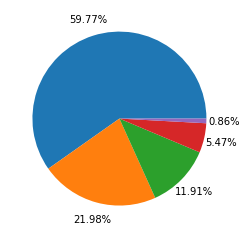

In [84]:
plt.pie(user_buy_cal["percent"], autopct='%.2f%%', pctdistance = 1.2)
# plt.title("顾客群购买量占比")
plt.show()

In [72]:
user_buy_cal

amount   percent
0  71846.0  0.597696
1  26426.0  0.219841
2  14319.0  0.119122
3   6580.0  0.054740
4   1034.0  0.008602

In [86]:
user_freq["important_buy"] = user_freq.apply(lambda r: 1 if r["buy"] >= 18 else 0, axis = 1)

#### 二八分析 浏览量 user - item

In [74]:
total = sum(user_freq["item_view"])
total

4677501

In [88]:
total = sum(user_freq["item_view"])
user_freq = user_freq.sort_values(by = ["item_view"], ascending = False)

length = 5
slice_len = math.ceil(user_freq.shape[0] / length)
slice_amount, slice_percent = [], []

for i in range(length):
    index_0, index_1 = i*slice_len, (i+1)*slice_len
    slice_buy = sum(user_freq[index_0:index_1]["item_view"])
    print(user_freq[index_0: index_0+1]["item_view"].values, user_freq[index_1: index_1 + 1]["item_view"].values)
    slice_amount.append(slice_buy)
    slice_percent.append(slice_buy/total)

user_view_cal = pd.DataFrame({"amount": slice_amount,
                             "percent": slice_percent})
# user_buy_cal.to_excel("user_buy_cal.xlsx")

[14011] [700]
[700] [378]
[378] [209]
[209] [99]
[99] []


In [89]:
user_view_cal

amount   percent
0  2675961  0.572092
1  1024901  0.219113
2   574234  0.122765
3   301211  0.064396
4   101194  0.021634

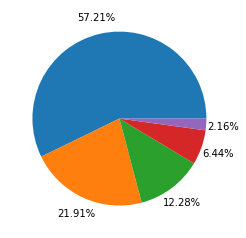

In [90]:
plt.pie(user_view_cal["percent"], autopct='%.2f%%', pctdistance = 1.2)
# plt.title("顾客群购买量占比")
plt.show()

In [91]:
# user_view_cal.to_excel("user_view_cal.xlsx")

In [93]:
user_freq["important_view"] = user_freq.apply(lambda r: 1 if r["item_view"] >= 700 else 0, axis =1)

### 研究重点用户

In [100]:
train_df = user_freq[(user_freq["important_view"] == 1) & (user_freq["important_buy"] == 1)]
train_df.shape

(1027, 26)

In [101]:
# train_df.columns

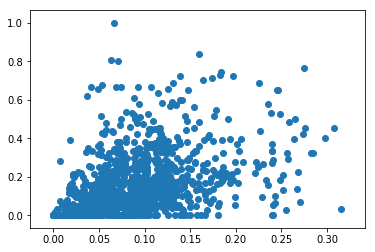

In [98]:
plt.scatter(train_df["sale_view_ratio"],train_df["sale_buy_ratio"])

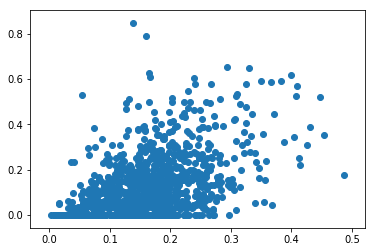

In [99]:
plt.scatter(train_df["presale_view_ratio"],train_df["presale_buy_ratio"])

In [102]:
 train_df.to_excel("important_user.xlsx")

In [104]:
train_df["sale_view_ratio"].median(), train_df["sale_buy_ratio"].median()

(0.07902839548409168, 0.1111111111111111)

### 尝试聚类分析

In [130]:
train_df = copy.deepcopy(user_freq)

In [70]:
train_df["c&a"] = train_df.apply(lambda r: r["collect"] + r["add_basket"], axis = 1)
train_df["pre_c&a"] = train_df.apply(lambda r: r["presale_collect"] + r["presale_add_basket"], axis = 1)
train_df["sale_c&a"] = train_df.apply(lambda r: r["sale_collect"] + r["sale_add_basket"], axis = 1)

In [129]:
# user_freq.columns

In [131]:
# c&a, pre_c&a. sale_c&a 
feats = ["view", "buy", "presale_view", "presale_buy", "sale_view", "sale_buy", 'sale_buy_ratio']
train_df = train_df[feats]

In [88]:
# min_v, max_v = int(min(train_df["buy"])), int(max(train_df["buy"]))
# plt.hist(train_df["buy"], bins = range(min_v, max_v, 1)
# #          .map(lambda x: math.log(x))
#         )

(array([  13.,   27.,  111.,  350.,  922., 2262., 3424., 2324.,  544.,
          23.]),
 array([0.        , 0.44427932, 0.88855865, 1.33283797, 1.77711729,
        2.22139661, 2.66567594, 3.10995526, 3.55423458, 3.9985139 ,
        4.44279323]),
 <a list of 10 Patch objects>)

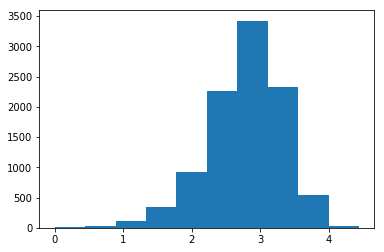

In [132]:
plt.hist(train_df["view"].map(lambda x: math.log(x, 10)))

(array([1114., 1411., 2188., 2442., 1791.,  819.,  199.,   30.,    3.,
           3.]),
 array([0.        , 0.2908485 , 0.581697  , 0.87254551, 1.16339401,
        1.45424251, 1.74509101, 2.03593951, 2.32678802, 2.61763652,
        2.90848502]),
 <a list of 10 Patch objects>)

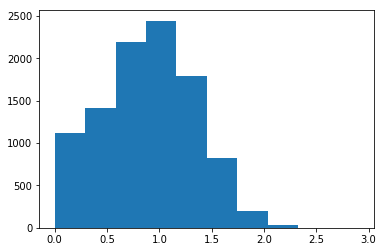

In [87]:
plt.hist(train_df["buy"].map(lambda x: math.log(x + 1, 10)))

In [93]:
# train_df["buy"].median(), train_df["buy"].mean()

In [142]:
train_df["scaled_v"] = train_df["view"].map(lambda x: math.log(x, 10))
train_df["scaled_b"] = train_df["buy"].map(lambda x: math.log(x + 1, 10))

In [135]:
# train_df[["scaled_v", "scaled_b"]]

In [117]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [109]:
# learners = KMeans(n_clusters = 5).fit(train_df[["scaled_v", "scaled_b"]])

In [114]:
# train_df["label"] = learners.labels_

In [113]:
# for label, color in zip([0, 1, 2, 3, 4], ["r", "g", "b"]):
#     cluster = train_df[train_df["label"] == label]
#     plt.plot(cluster["scaled_v"], cluster["scaled_b"], color)

In [136]:
# train_df["scaled_b"]

In [149]:
scaler = preprocessing.MinMaxScaler()
train_df["scaled_b"] = scaler.fit_transform([train_df["scaled_b"]])[0]

In [105]:
# train_df[["scaled_b", "sale_buy_ratio"]]

#### 时间分析

In [114]:
start = datetime.datetime(2014, 11, 18)
end = datetime.datetime(2014, 12, 2)
time_df = df[(df["time"] >= start) & (df["time"] < end)]

In [125]:
def if_weekend(w):
    if w in [1, 2, 3, 4, 5]:
        return 0
    return 1

time_df["if_weekend"] = time_df["weekday"].map(if_weekend)

/home/yangsi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [169]:
def hour_type(hour):
    if hour in [ 2, 3, 4, 5, 6]:
        return 0
    elif hour in [ 7, 8, 9]:
        return 1
    elif hour in [10, 11, 12]:
        return 2
    elif hour in [13, 14, 15, 16]:
        return 3
    elif hour in [17, 18, 19 ]:
        return 4
    elif hour in [20, 21, 22]:
        return 5
    else:
        return 6

time_df["hour_duration"] = time_df["hour"].map(hour_type)

/home/yangsi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [170]:
time_pv_df = time_df[time_df["behavior_type"] == 1]
time_buy_df = time_df[time_df["behavior_type"] == 4]

In [192]:
# time_pv_df

In [146]:
user_time_df = time_pv_df.groupby(["user_id", "if_weekend"]).size()
user_time_df = pd.DataFrame(user_time_df).unstack()
user_time_df.columns = ["weekday_count", "weekend_count"]
user_time_df = user_time_df.fillna(0)
user_time_df["weekend_ratio"] = user_time_df.apply(lambda r: r["weekend_count"]/r["weekday_count"], axis = 1)

/home/yangsi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [148]:
# user_time_df.sort_values(by=["weekend_ratio"], ascending =  False)

In [151]:
user_time_df.shape

(9604, 3)

In [152]:
user_time_df[user_time_df["weekend_ratio"] > 0.5].shape

(3557, 3)

In [161]:
# plt.hist(user_time_df["weekend_ratio"])

In [172]:
# time_pv_df

In [177]:
user_hour_df = time_pv_df.groupby(["user_id", "if_weekend", "hour_duration"]).size()
user_hour_df = pd.DataFrame(user_hour_df)

In [182]:
# user_hour_df.unstack(["if_weekend", "hour_duration"])

In [185]:
user_hour_df = user_hour_df.reset_index()
user_hour_df = user_hour_df.rename( columns = {0: "count"})

In [188]:
user_sum = user_hour_df.groupby(["user_id"])["count"].sum()
user_sum = pd.DataFrame(user_sum)
user_sum.columns = ["total_pv"]
user_sum[:5]

total_pv
user_id          
4913          963
6118           38
7528           76
7591          145
12645         103

In [189]:
user_hour_df = pd.merge(user_hour_df, user_sum, left_on="user_id", right_index = True, how = "left")

In [191]:
user_hour_df["time_percent"] = user_hour_df.apply(lambda r: r["count"]/r["total_pv"], axis = 1)
user_hour_df

user_id  if_weekend  hour_duration  count  total_pv  time_percent
0           4913           0              1     18       963      0.018692
1           4913           0              2    134       963      0.139148
2           4913           0              3    120       963      0.124611
3           4913           0              4     41       963      0.042575
4           4913           0              5    107       963      0.111111
5           4913           0              6    275       963      0.285566
6           4913           1              1     28       963      0.029076
7           4913           1              2     35       963      0.036345
8           4913           1              3     31       963      0.032191
9           4913           1              4     35       963      0.036345
10          4913           1              5     76       963      0.078920
11          4913           1              6     63       963      0.065421
12          6118           0              2      8        38      0.210526
13          6118           1              2      2        38      0.052632
14          6118           1              3      7        38      0.184211
15          6118           1              5      9        38      0.236842
16          6118           1              6     12        38      0.315789
17          7528           0              1      3        76      0.039474
18          7528           0              3     16        76      0.210526
19          7528           0              5     13        76      0.171053
20          7528           1              3     44        76      0.578947
21          7591           0              1      1       145      0.006897
22          7591           0              2     53       145      0.365517
23          7591           0              3     41       145      0.282759
24          7591           0              4      1       145      0.006897
25          7591           0              5     42       145      0.289655
26          7591           1              3      7       145      0.048276
27         12645           0              1     15       103      0.145631
28         12645           0              2      6       103      0.058252
29         12645           0              3     19       103      0.184466
...          ...         ...            ...    ...       ...           ...
80438  142430177           1              4     87       439      0.198178
80439  142430177           1              5     20       439      0.045558
80440  142430177           1              6      2       439      0.004556
80441  142450275           0              0      4      2281      0.001754
80442  142450275           0              1     95      2281      0.041648
80443  142450275           0              2     28      2281      0.012275
80444  142450275           0              3    830      2281      0.363875
80445  142450275           0              4    232      2281      0.101710
80446  142450275           0              5    488      2281      0.213941
80447  142450275           0              6     14      2281      0.006138
80448  142450275           1              0     37      2281      0.016221
80449  142450275           1              1     82      2281      0.035949
80450  142450275           1              2     33      2281      0.014467
80451  142450275           1              3    128      2281      0.056116
80452  142450275           1              4    114      2281      0.049978
80453  142450275           1              5    157      2281      0.068829
80454  142450275           1              6     39      2281      0.017098
80455  142455899           0              0      5      1026      0.004873
80456  142455899           0              1    187      1026      0.182261
80457  142455899           0              2     52      1026      0.050682
80458  142455899           0              3     75      1026      0.073099
80459  142455899           0      

In [196]:
# def cal_most_freq(user):
user_max_percent = user_hour_df.groupby(["user_id"])["time_percent"].max()
user_max_percent  = pd.DataFrame(user_max_percent)
user_max_percent.columns = ["time_percent"]
user_max_percent = user_max_percent.reset_index()

In [198]:
user_max_percent = pd.merge(user_max_percent, user_hour_df, 
                            left_on = ["user_id", "time_percent"],
                            right_on = ["user_id", "time_percent"],
                            how = "left")

In [201]:
user_max_percent = user_max_percent.sort_values(by = ["total_pv"], ascending = False)
# user_max_percent.to_excel("user_freq_time.xlsx")

In [203]:
user_max_percent["day_type"] = user_max_percent["if_weekend"].map(lambda x: "工作日" if x == 0 else "周末")

In [204]:
user_max_percent.to_excel("user_freq_time.xlsx")

### 用户偏好类别

In [43]:
user_freq[["view_cat", "item_view"]]

view_cat  item_view
user_id                       
4913            121        664
6118             19         52
7528             12         73
7591             62        185
12645            40         82
45368             9         17
54056             3         11
63348            31        115
79824            69        239
88930           109        453
90472            37         57
100539          101        359
104155           54        194
109103           32        126
113251           65        141
113960          141        720
114088           12         17
120873           66        810
134658           42        130
151617          108        665
156608           51        214
157097          169        719
189833          299       1137
190327          125        272
191366           82        464
213655          155        991
217996           13         19
227293           70        262
230711           64        158
239485           34        103
...             ...        ...
142064691       119        578
142073213        55        273
142081324        73       1068
142095821       105        449
142120051       375       3000
142126535       101        334
142128942       225       1116
142128951        56        118
142133884        20         90
142138619        64        286
142144275        95        441
142151675        95        363
142168798       161        873
142171065         6         18
142181816        97       1294
142204924        40        162
142216376       107        408
142227202        43        138
142244794       213       1361
142265405        54        114
142306250        98        501
142306361        80        257
142337230        64        209
142358910        66        417
142368840        67        276
142376113        23        108
142412247        49        157
142430177       100        523
142450275       189       2388
142455899       152        509

[10000 rows x 2 columns]

In [45]:
user_freq["avg_item_per_cat"] = user_freq.apply(lambda r: r["item_buy"]/r["buy_cat"], axis = 1)

/home/yangsi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [46]:
user_freq.sort_values(by=["avg_item_per_cat"], ascending = False)[["item_buy", "buy_cat", "avg_item_per_cat"]]

item_buy  buy_cat  avg_item_per_cat
user_id                                       
56970308       30.0      1.0         30.000000
42281108       25.0      1.0         25.000000
39825915       12.0      1.0         12.000000
122338823     545.0     46.0         11.847826
54340712       48.0      6.0          8.000000
123842164     299.0     39.0          7.666667
21329952        7.0      1.0          7.000000
59781337       59.0     11.0          5.363636
117606829      15.0      3.0          5.000000
84916776       25.0      6.0          4.166667
134928476       8.0      2.0          4.000000
137625581       4.0      1.0          4.000000
65116572        8.0      2.0          4.000000
49026431       31.0      8.0          3.875000
65352076       30.0      8.0          3.750000
131959781      26.0      7.0          3.714286
115001382      11.0      3.0          3.666667
56978241       11.0      3.0          3.666667
51492142      235.0     66.0          3.560606
9299440         7.0      2.0          3.500000
78722474        7.0      2.0          3.500000
128733919      21.0      6.0          3.500000
25678919       44.0     13.0          3.384615
113830171      54.0     16.0          3.375000
63588363       13.0      4.0          3.250000
134319759      16.0      5.0          3.200000
44817147       41.0     13.0          3.153846
59763374       22.0      7.0          3.142857
111474212      25.0      8.0          3.125000
110989739      53.0     17.0          3.117647
...             ...      ...               ...
138452331       0.0      0.0               NaN
138654093       0.0      0.0               NaN
138675868       0.0      0.0               NaN
138765963       0.0      0.0               NaN
139061840       0.0      0.0               NaN
139207603       0.0      0.0               NaN
139333186       0.0      0.0               NaN
139401388       0.0      0.0               NaN
139458443       0.0      0.0               NaN
139471492       0.0      0.0               NaN
139592313       0.0      0.0               NaN
139641075       0.0      0.0               NaN
139691381       0.0      0.0               NaN
139792009       0.0      0.0               NaN
139944915       0.0      0.0               NaN
139954377       0.0      0.0               NaN
139961106       0.0      0.0               NaN
140145748       0.0      0.0               NaN
140394724       0.0      0.0               NaN
140546553       0.0      0.0               NaN
140548532       0.0      0.0               NaN
140627651       0.0      0.0               NaN
140643525       0.0      0.0               NaN
140734558       0.0      0.0               NaN
140935086       0.0      0.0               NaN
141266970       0.0      0.0               NaN
141284597       0.0      0.0               NaN
141384260       0.0      0.0               NaN
142133884       0.0      0.0               NaN
142171065       0.0      0.0               NaN

[10000 rows x 3 columns]

In [54]:
# df[(df["user_id"] == 122338823) & (df["behavior_type"] == 4) ].sort_values(by = ["time"])

In [58]:
user_buy_record = df_4.groupby(["user_id", "item_category", "time"]).size()
user_buy_record = pd.DataFrame( user_buy_record )
user_buy_record.columns = ["amount"]
user_buy_record = user_buy_record.reset_index()

In [64]:
buy_count = user_buy_record.groupby(["user_id", "item_category"]).size()
buy_count = pd.DataFrame(buy_count)
buy_count.columns = ["buy_count"]
buy_count = buy_count.reset_index()

In [65]:
user_buy_record = pd.merge(user_buy_record, buy_count, 
                           left_on = ["user_id", "item_category"],
                           right_on = ["user_id", "item_category"],
                           how = "left")

In [70]:
# user_buy_record.sort_values( by=["buy_count"], ascending = False)

In [71]:
# user_buy_record[user_buy_record["buy_count"] > 2]

In [72]:
user_buy_record.to_excel("user_buy_record.xlsx")

In [78]:
user_buy_record[user_buy_record["buy_count"]>2]#[:6] #.to_excel("temp_user_buy.xlsx")

user_id  item_category                time  amount  buy_count
269       247543           9516 2014-11-21 15:00:00       1          3
270       247543           9516 2014-11-21 16:00:00       1          3
271       247543           9516 2014-12-12 01:00:00       1          3
366       475826           1863 2014-12-03 15:00:00       2          3
367       475826           1863 2014-12-12 09:00:00       2          3
368       475826           1863 2014-12-12 13:00:00       1          3
397       475826          10392 2014-11-26 00:00:00       4          5
398       475826          10392 2014-11-27 15:00:00       1          5
399       475826          10392 2014-12-04 21:00:00       5          5
400       475826          10392 2014-12-14 20:00:00       2          5
401       475826          10392 2014-12-16 17:00:00      11          5
413       483640           3000 2014-11-23 13:00:00       1          3
414       483640           3000 2014-11-28 13:00:00       1          3
415       483640           3000 2014-11-30 18:00:00       1          3
528       632347           9517 2014-11-20 10:00:00       1          3
529       632347           9517 2014-11-23 20:00:00       1          3
530       632347           9517 2014-11-25 12:00:00       1          3
550       704891          10961 2014-12-10 15:00:00       1          3
551       704891          10961 2014-12-15 22:00:00       1          3
552       704891          10961 2014-12-16 12:00:00       1          3
603       807106           4276 2014-11-26 14:00:00       2         29
604       807106           4276 2014-11-26 23:00:00       1         29
605       807106           4276 2014-11-27 08:00:00       1         29
606       807106           4276 2014-11-27 09:00:00       1         29
607       807106           4276 2014-11-27 10:00:00       1         29
608       807106           4276 2014-11-27 12:00:00       3         29
609       807106           4276 2014-11-27 13:00:00       1         29
610       807106           4276 2014-11-27 14:00:00       2         29
611       807106           4276 2014-11-28 10:00:00       2         29
612       807106           4276 2014-11-28 11:00:00       1         29
...          ...            ...                 ...     ...        ...
92521  142051625           1911 2014-12-17 17:00:00       1          5
92560  142081324           1838 2014-11-24 14:00:00       1          3
92561  142081324           1838 2014-11-29 18:00:00       2          3
92562  142081324           1838 2014-12-08 15:00:00       2          3
92587  142120051           2993 2014-12-05 06:00:00       1          3
92588  142120051           2993 2014-12-06 08:00:00       1          3
92589  142120051           2993 2014-12-08 18:00:00       2          3
92595  142120051           5271 2014-11-28 00:00:00       1          5
92596  142120051           5271 2014-12-09 12:00:00       1          5
92597  142120051           5271 2014-12-12 16:00:00       2          5
92598  142120051           5271 2014-12-13 14:00:00       1          5
92599  142120051           5271 2014-12-16 22:00:00       1          5
92608  142120051           9516 2014-11-24 23:00:00       1          5
92609  142120051           9516 2014-11-28 00:00:00       3          5
92610  142120051           9516 2014-12-05 09:00:00       2          5
92611  142120051           9516 2014-12-06 12:00:00       1          5
92612  142120051           9516 2014-12-13 17:00:00       3          5
92631  142128942           1911 2014-11-19 19:00:00       1          4
92632  142128942           1911 2014-11-23 22:00:00       1          4
92633  142128942           1911 2014-11-24 20:00:00       1          4
92634  142128942           1911 2014-11-26 19:00:00       1          4
92741  142244794           5468 2014-11-25 20:00:00       1          3
92742  142244794           5468 2014-11-28 12:00:00       1          3
92743  142244794           5468 2014-12-11 11:00:00       1          3
92822  142450275            552 2